In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Start Spark session
spark = SparkSession.builder.appName("HR_Analytics_Analysis").getOrCreate()

# Load the cleaned CSV
df = spark.read.option("header", True).option("inferSchema", True) \
    .csv("file:///C:/Users/Ankita/Downloads/HR_Cleaned.csv")

df.show(5, truncate=False)
df.printSchema()

+-----+---+----------------------+---------------------+-------------+---------+-----------------+
|EmpID|Age|Department            |JobRole              |MonthlyIncome|Attrition|PerformanceRating|
+-----+---+----------------------+---------------------+-------------+---------+-----------------+
|RM297|18 |Research & Development|Laboratory Technician|1420.0       |Yes      |3.0              |
|RM302|18 |Sales                 |Sales Representative |1200.0       |No       |3.0              |
|RM458|18 |Sales                 |Sales Representative |1878.0       |Yes      |3.0              |
|RM728|18 |Research & Development|Research Scientist   |1051.0       |No       |3.0              |
|RM829|18 |Research & Development|Laboratory Technician|1904.0       |Yes      |3.0              |
+-----+---+----------------------+---------------------+-------------+---------+-----------------+
only showing top 5 rows

root
 |-- EmpID: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- D

In [3]:
# 1. Total number of employees
total_employees = df.select("EmpID").distinct().count()
print("1) Total number of employees:", total_employees)

1) Total number of employees: 1470


In [4]:
# 2. Total number of departments
total_departments = df.select("Department").distinct().count()
print("2) Total number of departments:", total_departments)

2) Total number of departments: 3


In [5]:
# 3. Department names
print("3) Department names:")
df.select("Department").distinct().show(truncate=False)

3) Department names:
+----------------------+
|Department            |
+----------------------+
|Sales                 |
|Research & Development|
|Human Resources       |
+----------------------+



In [6]:
# 4. Employees in each department
print("4) Employees per department:")
df.groupBy("Department").agg(F.countDistinct("EmpID").alias("EmployeeCount")) \
  .orderBy("EmployeeCount", ascending=False).show()

4) Employees per department:
+--------------------+-------------+
|          Department|EmployeeCount|
+--------------------+-------------+
|Research & Develo...|          961|
|               Sales|          446|
|     Human Resources|           63|
+--------------------+-------------+



In [7]:
# 5. Min and Max salaries in each department (ascending order by MinSalary)
print("5) Min & Max MonthlyIncome by Department:")
df.groupBy("Department").agg(
    F.min("MonthlyIncome").alias("MinSalary"),
    F.max("MonthlyIncome").alias("MaxSalary")
).orderBy("MinSalary", ascending=True).show()

5) Min & Max MonthlyIncome by Department:
+--------------------+---------+---------+
|          Department|MinSalary|MaxSalary|
+--------------------+---------+---------+
|Research & Develo...|   1009.0|  19999.0|
|               Sales|   1052.0|  19847.0|
|     Human Resources|   1555.0|  19717.0|
+--------------------+---------+---------+



In [8]:
# 6. Raise salaries $500 for employees Age > 45
df_updated = df.withColumn(
    "MonthlyIncome",
    F.when(F.col("Age") > 45, F.col("MonthlyIncome") + 500).otherwise(F.col("MonthlyIncome"))
)

In [9]:
print("6) Sample rows with salary raise:")
df_updated.filter(F.col("Age") > 45).select("EmpID", "Age", "MonthlyIncome").show(5)

6) Sample rows with salary raise:
+-----+---+-------------+
|EmpID|Age|MonthlyIncome|
+-----+---+-------------+
|RM030| 46|      19447.0|
|RM049| 46|       6272.0|
|RM080| 46|       5521.0|
|RM090| 46|      10119.0|
|RM094| 46|      11173.0|
+-----+---+-------------+
only showing top 5 rows



In [10]:
# 7. DataFrame of employees Age > 45 and save to file
df_age_gt_45 = df_updated.filter(F.col("Age") > 45)

In [11]:
df_age_gt_45.coalesce(1).write.option("header", True).mode("overwrite") \
    .csv("file:///C:/Users/Ankita/Desktop/university 4th year/BDA LAB/BigDataAnalytics/7.Employee Data Analysis Using PySpark(Mini Project)/Employees_Age_GT45")

In [12]:
print("7) Saved employees with Age > 45 to: C:/Users/Ankita/Desktop/university 4th year/BDA LAB/BigDataAnalytics/7.Employee Data Analysis Using PySpark(Mini Project)/Employees_Age_GT45")

7) Saved employees with Age > 45 to: C:/Users/Ankita/Desktop/university 4th year/BDA LAB/BigDataAnalytics/7.Employee Data Analysis Using PySpark(Mini Project)/Employees_Age_GT45


In [13]:
# 8. Average MonthlyIncome and PerformanceRating grouped by JobRole
print("8) Average MonthlyIncome and PerformanceRating by JobRole:")
df.groupBy("JobRole").agg(
    F.round(F.avg("MonthlyIncome"),2).alias("AvgMonthlyIncome"),
    F.round(F.avg("PerformanceRating"),2).alias("AvgPerformanceRating")
).orderBy("AvgMonthlyIncome", ascending=False).show(truncate=False)

8) Average MonthlyIncome and PerformanceRating by JobRole:
+-------------------------+----------------+--------------------+
|JobRole                  |AvgMonthlyIncome|AvgPerformanceRating|
+-------------------------+----------------+--------------------+
|Manager                  |17181.68        |3.2                 |
|Research Director        |16033.55        |3.1                 |
|Healthcare Representative|7547.42         |3.15                |
|Manufacturing Director   |7305.26         |3.19                |
|Sales Executive          |6947.08         |3.12                |
|Human Resources          |4235.75         |3.13                |
|Research Scientist       |3241.83         |3.17                |
|Laboratory Technician    |3239.09         |3.16                |
|Sales Representative     |2630.05         |3.14                |
+-------------------------+----------------+--------------------+



In [14]:
import pandas as pd

pdf = pd.read_csv("C:/Users/Ankita/Downloads/HR_Cleaned.csv")
pdf.head()

,EmpID,Age,Department,JobRole,MonthlyIncome,Attrition,PerformanceRating
0,RM297,18,Research & Development,Laboratory Technician,1420.0,Yes,3.0
1,RM302,18,Sales,Sales Representative,1200.0,No,3.0
2,RM458,18,Sales,Sales Representative,1878.0,Yes,3.0
3,RM728,18,Research & Development,Research Scientist,1051.0,No,3.0
4,RM829,18,Research & Development,Laboratory Technician,1904.0,Yes,3.0


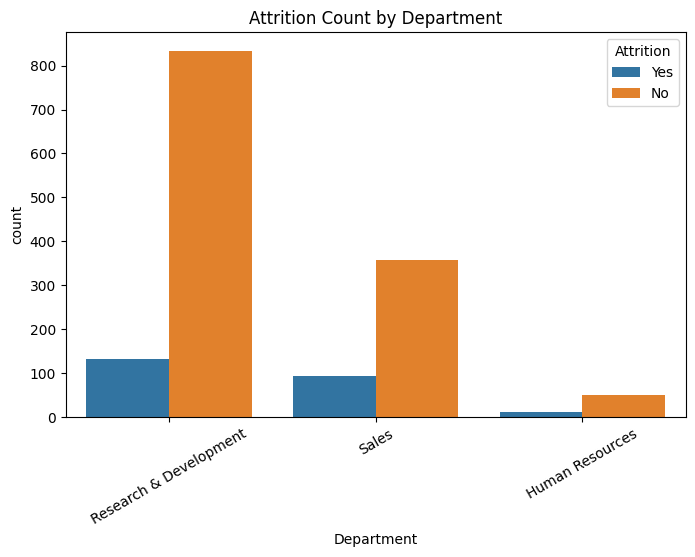

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 9. Attrition count by Department
plt.figure(figsize=(8,5))
sns.countplot(x="Department", hue="Attrition", data=pdf)
plt.title("Attrition Count by Department")
plt.xticks(rotation=30)
plt.show()


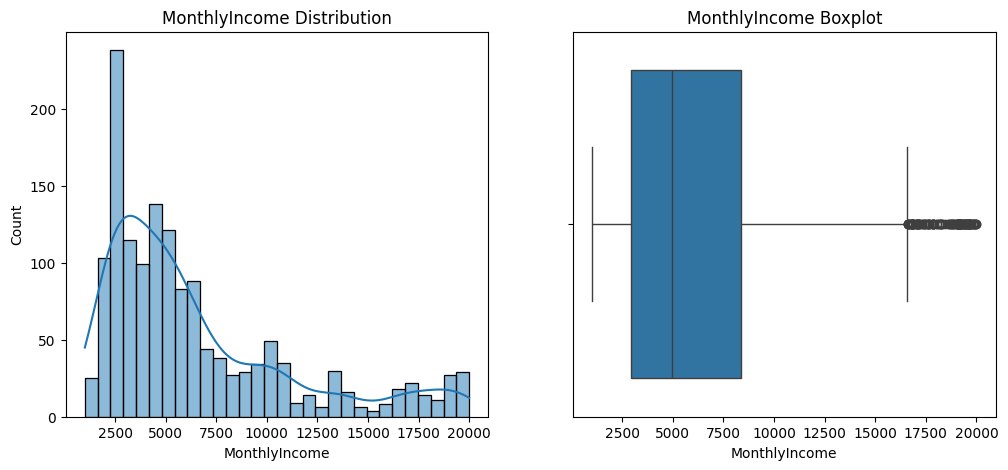

In [17]:
# 10. MonthlyIncome distribution (Histogram + Boxplot)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(pdf["MonthlyIncome"], bins=30, kde=True)
plt.title("MonthlyIncome Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=pdf["MonthlyIncome"])
plt.title("MonthlyIncome Boxplot")

plt.show()

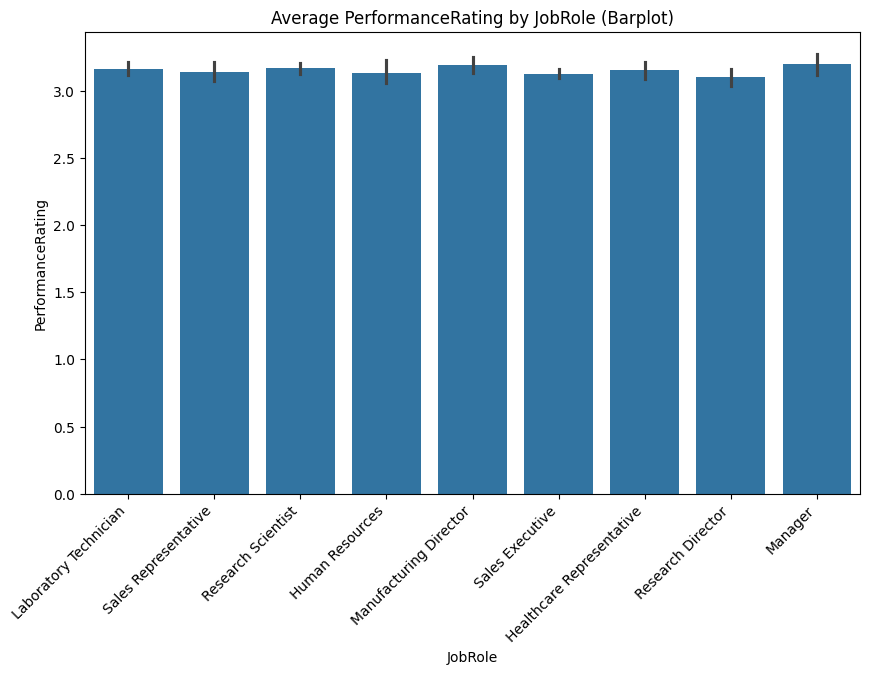

In [19]:
# 11. PerformanceRating vs JobRole
plt.figure(figsize=(10,6))
sns.barplot(x="JobRole", y="PerformanceRating", data=pdf, estimator=lambda x: sum(x)/len(x))
plt.xticks(rotation=45, ha="right")
plt.title("Average PerformanceRating by JobRole (Barplot)")
plt.show()